In [1]:
# Paul-Jason Mello
# Prof Shim
# Feb 24, 2022
# HW 3

# Regularization

## 1 Explain what is Regularization? 

In [2]:
# Regularization is in essence an attempt to to standardize a data set in order to avoid overfitting.
# There are many techniques which can offer regularization such as Lasso, Ridge, and Dropout. 
# Each of these methods are able to take some data and better approximate the model for use in a generalized
# sense which can help to alleviate/avoid overfitting.

## 2 Explain how regularization is performed in linear regression? 

In [3]:
# Linear Regression is defined by the following equation: L(w) = n(summation(i))((y^i)-w(x^i))^2

# Here we continually update a linear model so that the predicted model has the least errors compared
# to the target data.
# Despite this desire to fit the data as best as we can, we avoid doing so because we this would result
# in overfitting to our specific dataset. Regularization helps by feeding the model more doubt about each 
# data point through a process of updates which yields a more generalized model. 

## 3 Explain what is Ridge and Lasso regression? 

In [4]:
# Linear Regression is defined by the following equation: L(w) = n(summation(i))((y^i)-w(x^i))^2

# Regularization with Lasso and Ridge adds an additional equation to the end of our prior equation
#    in order to prevent the model from overfitting the data. This produces the following two equations:
# Lasso: L(w) = n(summation(i))(((y^i)-w(x^i))^2) + λ|w|
# Ridge: L(w) = n(summation(i))(((y^i)-w(x^i))^2) + λ(w^2)

# By updating the weight by some λ we can then find the minimized loss function. This method differs 
# between types of regularization, but they help avoid overfitting by accounting for adjusting w based on λ.
# In this way we can penalize models with higher complexity to find what data is more meaningful. 

# Lasso: (L1 Regularization)
#    Lasso is used because it can help to estimate the proper number of features to be used for 
#        feature selection
# Ridge: (L2 Regularization)
#    We can throw out the unbiased estimator in favor of adding λ as a means of taking the inverse of
#        the matrix. This adds further constraint to the updating parameters.

## 4 Perform Ridge and Lasso regression continuing the task of the previous homework

In [5]:
# For this section I avoided the redundent graphs but copied the same code as used in HW 2 
# Minor tweaks to perform ridge and Lasso Regression

In [6]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [7]:
boston = datasets.load_boston()

BostonData = pd.DataFrame(boston.data, columns = boston.feature_names) # Whole Data Set
medV = pd.DataFrame(boston.target, columns = ["MEDV"])
data = pd.concat([BostonData, medV], axis = 1) 
BostonData = pd.DataFrame(data)

BostonData.head(10)

BData = BostonData.drop(BostonData.columns[[0, 1, 2, 3, 4, 6, 7, 8, 9, 11]], axis = 1) # Partial Data Set

BDataClean = BData.drop(BData.columns[[0]], axis = 1) # Concise Data Set

C:\Users\GIGA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [8]:
def dataSplit(data):
    X = data.loc[:, data.columns != 'MEDV']
    Y = data.MEDV
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)
    return X_train, X_test, Y_train, Y_test

In [9]:
def normData(data):
    data_norm = (data - data.min()) / (data.max() - data.min())
    return data_norm

In [10]:
def modelRidge(X_train, Y_train):
    model = Ridge(alpha = .01)
    model.fit(X_train, Y_train)
    return model

In [11]:
def modelLasso(X_train, Y_train):
    model = Lasso(alpha = .001)
    model.fit(X_train, Y_train)
    return model

In [12]:
# K represents the number of folds we choose. This was tweaked through running the program multiple times
# we then found the individual K for each and paramaterized it.
def testing(X_train, Y_train, k, model):
    kfold = sk.model_selection.KFold(n_splits = k)
    accuracies = sk.model_selection.cross_val_score(model, X_train, Y_train)
    avg = sum(accuracies)/k
    print("Average Accuracy for " + str(k) + " folds: " + str(avg))

In [13]:
def modelTest(model, X_test, Y_test):
    y_predictions = model.predict(X_test)
    score = metrics.r2_score(Y_test, y_predictions)
    return score

In [14]:
# Next Three Cells are Ridge Regression

In [15]:
def dataModellingRidge(Data, k):
    X_train, X_test, Y_train, Y_test = dataSplit(Data)
    data_norm = normData(BostonData)
    model = modelRidge(X_train, Y_train)
    print("Ridge Regression:")
    accuracy = modelTest(model, X_test, Y_test)
    print("\nR^2 Accuracy: " + str(accuracy))

In [16]:
# Whole Data
dataModellingRidge(BostonData, 8)

Ridge Regression:

R^2 Accuracy: 0.6732999463439662


In [17]:
# Partial Data
dataModellingRidge(BData, 4)

Ridge Regression:

R^2 Accuracy: 0.5985586830630185


In [18]:
# Concise Data
dataModellingRidge(BDataClean, 8)

Ridge Regression:

R^2 Accuracy: 0.5131533127713614


In [19]:
# Next Three Cells are Lasso Regression

In [20]:
def dataModellingLasso(Data, k):
    X_train, X_test, Y_train, Y_test = dataSplit(Data)
    data_norm = normData(BostonData)
    model = modelLasso(X_train, Y_train)
    print("Lasso Regression:")
    accuracy = modelTest(model, X_test, Y_test)
    print("\nR^2 Accuracy: " + str(accuracy))

In [21]:
# Whole Data
dataModellingLasso(BostonData, 8)

Lasso Regression:

R^2 Accuracy: 0.6731947086233128


In [22]:
# Partial Data
dataModellingLasso(BData, 4)

Lasso Regression:

R^2 Accuracy: 0.5985627163456062


In [23]:
# Concise Data
dataModellingLasso(BDataClean, 8)

Lasso Regression:

R^2 Accuracy: 0.5131662237982395


## 5 Perform Ridge and Lasso regression on HCC.csv dataset after performing necessary pre-processing steps as mentioned in the previous homework

In [24]:
HCCFull = pd.read_csv('HCC.csv')
HCCFull.head(10)

,Unnamed: 0,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
0,0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,...,2.10,34.0,41,183.0,150.0,7.1,0.70,1.0,3.500000,1
1,2,1,0.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.40,58.0,68,202.0,109.0,7.0,2.10,5.0,13.000000,1
2,3,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,...,0.40,16.0,64,94.0,174.0,8.1,1.11,2.0,15.700000,0
3,4,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.70,147.0,306,173.0,109.0,6.9,1.80,1.0,9.000000,1
4,5,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,...,3.50,91.0,122,242.0,396.0,5.6,0.90,1.0,10.000000,0
5,6,1,0.0,0,0.0,1.0,1.0,1,1.0,0.0,...,2.72,119.0,183,143.0,211.0,7.3,0.80,5.0,2.600000,0
6,7,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,...,3.20,79.0,108,184.0,300.0,7.1,0.52,2.0,9.000000,0
7,8,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,...,3.30,26.0,59,115.0,63.0,6.1,0.59,1.0,6.400000,1
8,9,1,1.0,1,0.0,0.0,0.0,1,0.0,0.0,...,0.50,71.0,45,256.0,303.0,7.1,0.59,1.0,9.300000,1
9,10,1,0.0,1,0.0,0.0,1.0,1,0.0,0.0,...,3.00,90.0,334,494.0,236.0,7.6,0.80,5.0,6.747286,0


In [25]:
HCCFull.isnull().sum()

Unnamed: 0       0
1.Gen            0
2.Sym            0
3.Alc            0
4.HepB           0
6.HepB           0
7.HepC           0
8.Cir            0
11.Dia           0
12.Obe           0
13.Hem           0
14.Art           0
15.CRen          0
16.HIV           0
17.Non           0
19.Spl           0
20.PHyp          0
21.Thr           0
22.LMet          0
23.Rad           0
24.Agedia        0
27.Sta           0
28.Encdeg        0
29.Ascdeg        0
 30.IntNorRat    0
 31.Alp          0
 32.Hae          0
 33.MCorVol      0
 34.Leu          0
35.Plat          0
36.Alb           0
37.Bil           0
38.Ala           0
39.Aspa          0
40.Gam           0
41.Alk           0
42.Prot          0
43.Crea          0
44.NNod          0
45.dnod          0
Class            0
dtype: int64

[Text(0.5, 1.0, 'Correlation Matrix\n')]

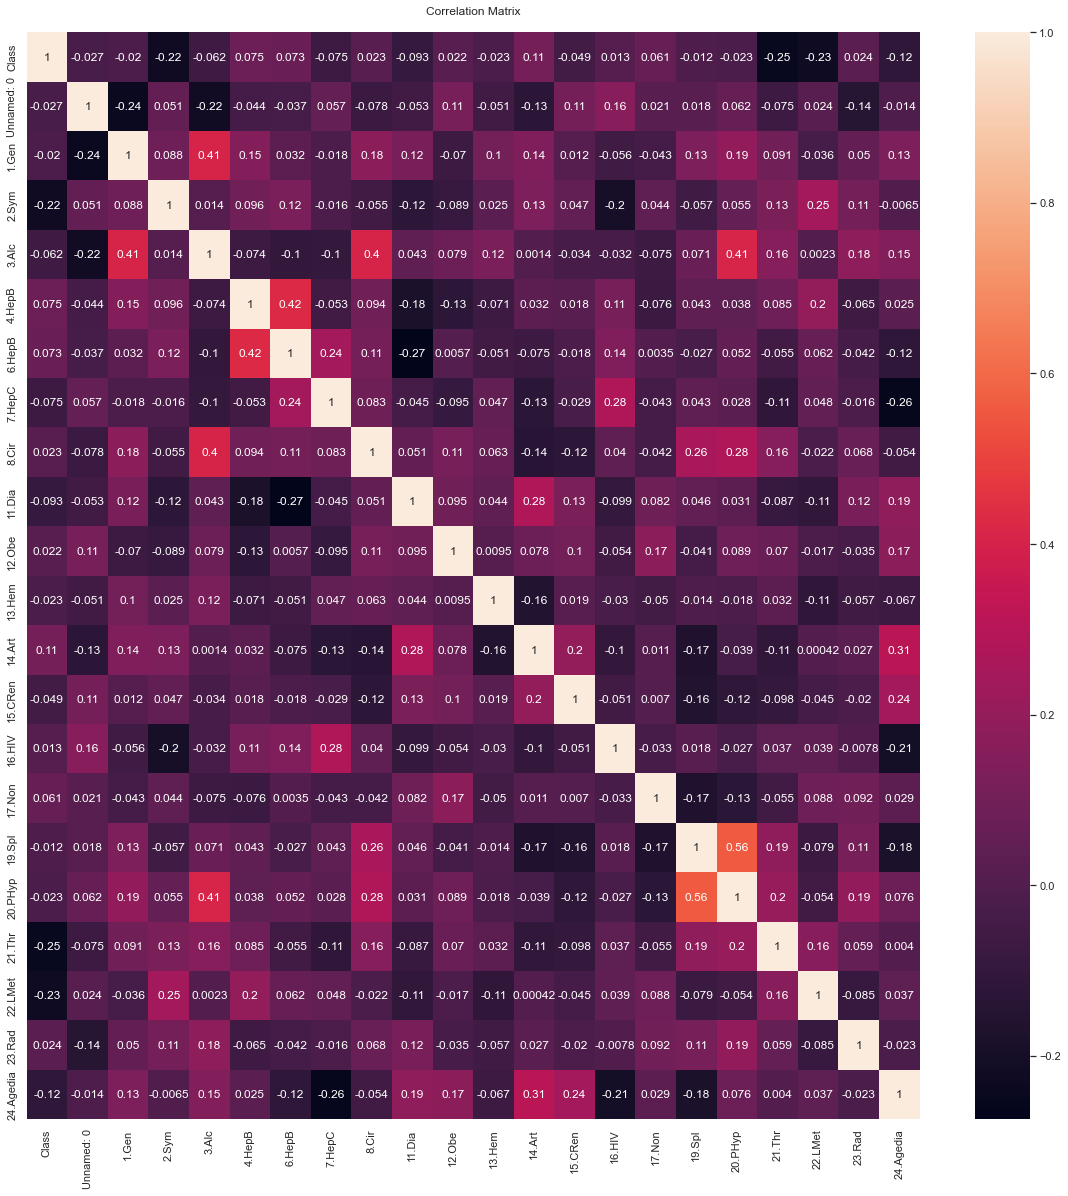

In [26]:
cols = [40,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
sns.set(rc = {'figure.figsize':(20,20)})
mapData = sns.heatmap(HCCFull.iloc[:,cols].corr(), annot = True)
mapData.set(title = "Correlation Matrix\n")

[Text(0.5, 1.0, 'Correlation Matrix\n')]

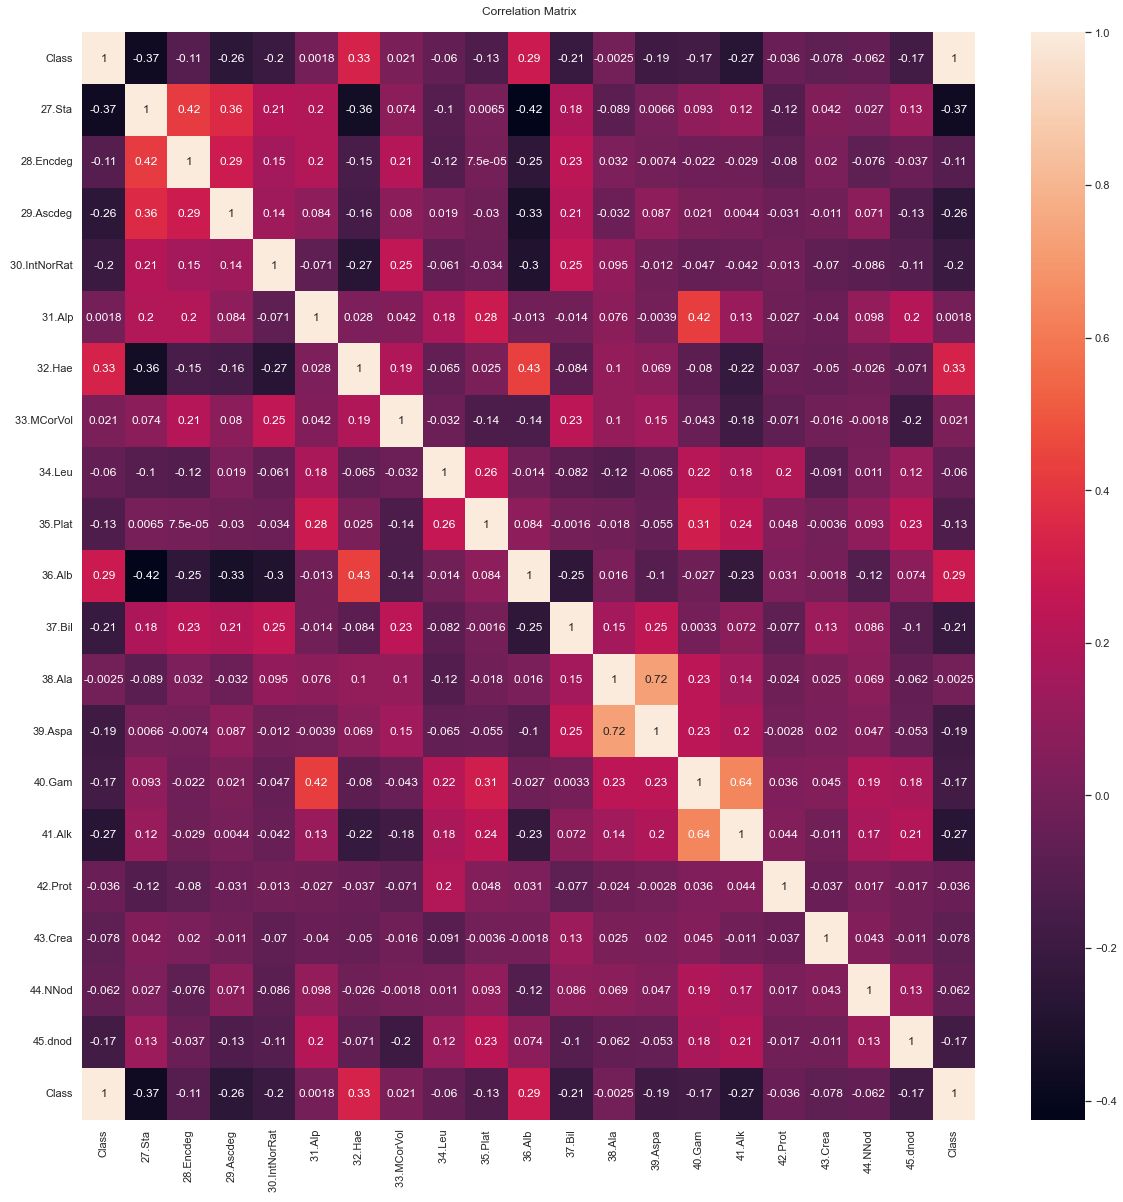

In [27]:
cols = [40,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
sns.set(rc = {'figure.figsize':(20,20)})
mapData = sns.heatmap(HCCFull.iloc[:,cols].corr(), annot = True)
mapData.set(title = "Correlation Matrix\n")

In [28]:
# After conducting some correlation testing I extracted thefollowing variables"
# 21.Thr, 27.Sta, 29.Ascdeg, 41.Alk
# Each of these had greater that .25 correlation with our chosen Y variable (#40 Class).
dropCol = [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,22,25,27,28,29,32,33,34,36,37,38,39]
addedDrop = [0,2,5,6,7,8]
CleanHCC = HCCFull.copy()
CleanHCC.drop(CleanHCC.columns[dropCol], inplace = True, axis = 1)
CleanHCC.drop(CleanHCC.columns[addedDrop], inplace = True, axis = 1)
CleanHCC

,21.Thr,27.Sta,29.Ascdeg,41.Alk,Class
0,0.0,0,1.0,150.0,1
1,0.0,2,2.0,109.0,1
2,0.0,0,1.0,174.0,0
3,0.0,0,1.0,109.0,1
4,0.0,1,2.0,396.0,0
...,...,...,...,...,...
151,0.0,0,1.0,109.0,1
152,0.0,2,1.0,280.0,0
153,0.0,0,1.0,181.0,1
154,1.0,2,1.0,170.0,0


[Text(0.5, 1.0, 'Correlation Matrix\n')]

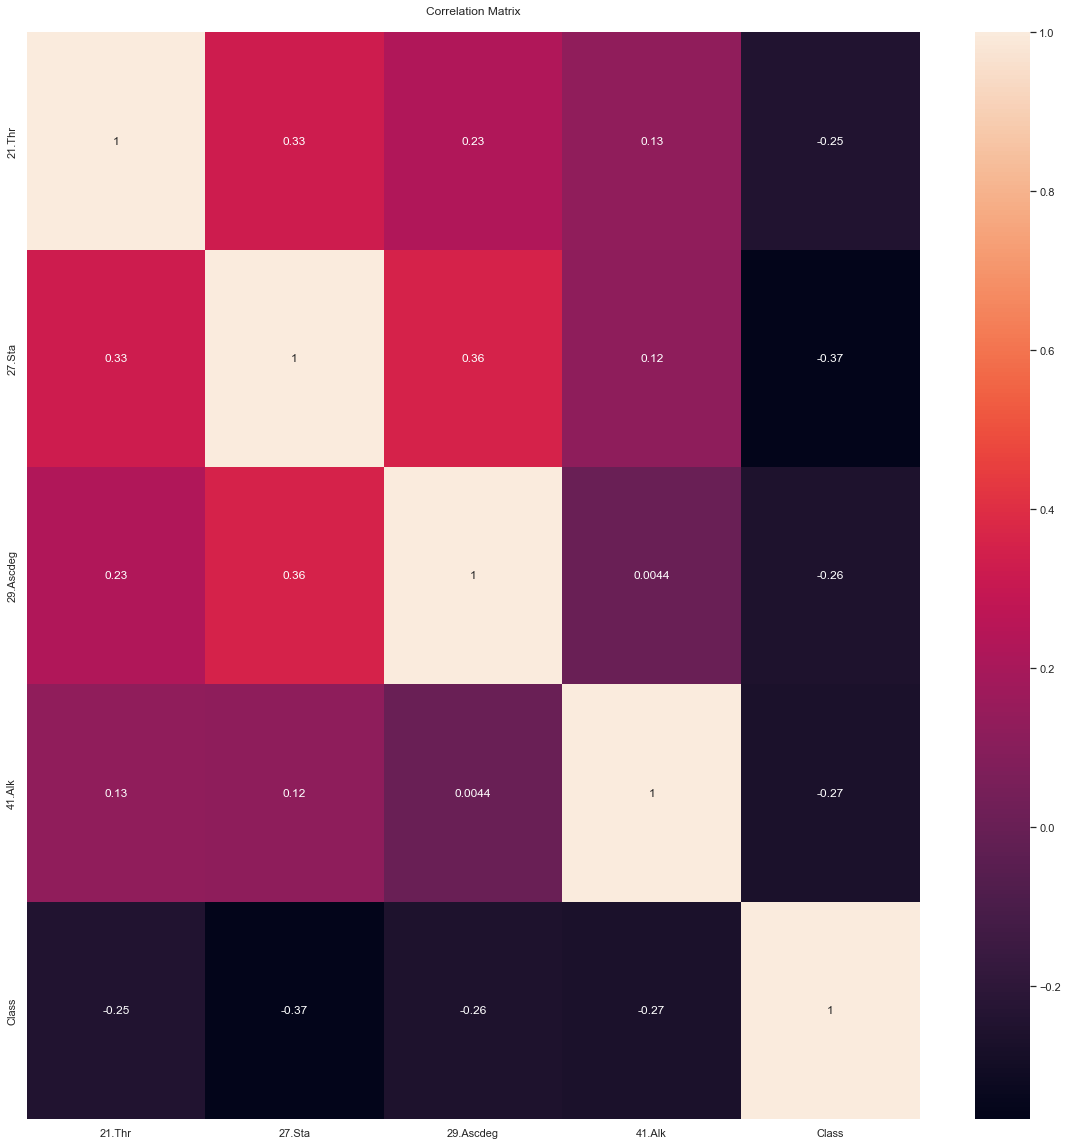

In [29]:
mapData = sns.heatmap(CleanHCC.corr(), annot = True)
mapData.set(title = "Correlation Matrix\n")

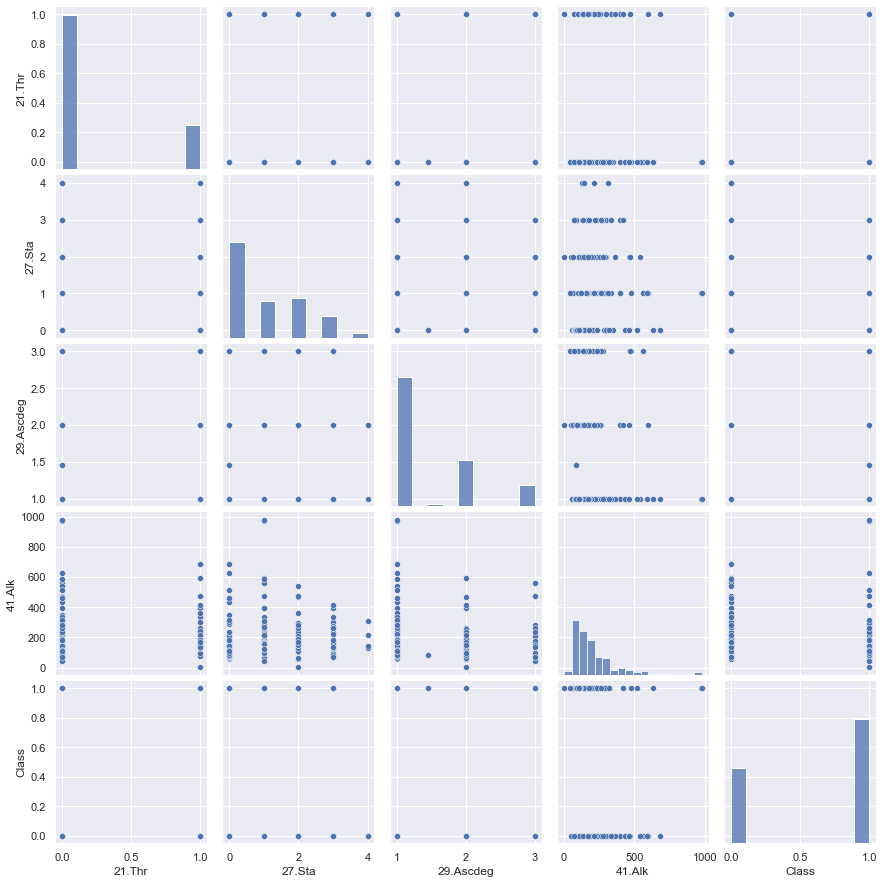

In [30]:
# As most observations are binary a pair plot such as this does not provide much evidence outside of
# presenting us with distribution tendencies.
sns.pairplot(CleanHCC)

In [31]:
def dataSplit2(data):
    X = data.loc[:, data.columns != 'Class']
    Y = data.loc[:, data.columns == 'Class']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)
    return X_train, X_test, Y_train, Y_test

In [32]:
def modelTest2(model, X_test, Y_test):
    y_predictions = model.predict(X_test)
    score = metrics.r2_score(Y_test, y_predictions)
    return score

In [33]:
def dataModellingRidge2(Data):
    X_train, X_test, Y_train, Y_test = dataSplit2(Data)
    data_norm = normData(Data)
    model = modelRidge(X_train, Y_train)
    print("Ridge Regression:")
    accuracy = modelTest2(model, X_test, Y_test)
    print("\nR^2 Accuracy: " + str(accuracy))

In [34]:
def dataModellingLasso2(Data):
    X_train, X_test, Y_train, Y_test = dataSplit2(Data)
    data_norm = normData(Data)
    model = modelLasso(X_train, Y_train)
    print("Lasso Regression:")
    accuracy = modelTest2(model, X_test, Y_test)
    print("\nR^2 Accuracy: " + str(accuracy))

In [35]:
dataModellingRidge2(CleanHCC)

Ridge Regression:

R^2 Accuracy: 0.2924177470691638


In [36]:
dataModellingLasso2(CleanHCC)

Lasso Regression:

R^2 Accuracy: 0.28865909128537204


In [37]:
# Despite my efforts to extract the proper features we see that our R^2 using either process is awful.
# I'm not sure as to the root cause, but I believe a better combination of variables would provide
# a far better R^2. 
# Manually tweaking the learning rates in lasso and ridge also provided minor improvements.